In [7]:
import os
import numpy as np
import pandas as pd
from scipy.signal import welch
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
root = "/fsx/ao4elt7/"

In [9]:
atmosphere_path = os.path.join(root,"2023-06-17T04:45:34.077601116+00:00","atmosphere")
#atmosphere_path = os.path.join(root,"2023-06-21T04:26:39.399720124+00:00","atmosphere")
domeseeing_path = os.path.join(root,"2023-06-17T04:47:28.990062450+00:00","domeseeing")
windloading_path = os.path.join(root,"2023-06-17T22:01:02.570843509+00:00","windloading")


In [10]:
df_atmosphere = pd.read_parquet(os.path.join(atmosphere_path,"ngao.parquet"))
df_domeseeing = pd.read_parquet(os.path.join(domeseeing_path,"ngao.parquet"))
df_windloading = pd.read_parquet(os.path.join(windloading_path,"ngao.parquet"))
df = pd.concat([df_atmosphere['WfeRms'], df_domeseeing['WfeRms'], df_windloading['WfeRms']], axis=1)
df.columns = ['Atm. WfeRms', 'Atm.D.S. WfeRms', 'Atm.W.D.S. WfeRms']
df

,Atm. WfeRms,Atm.D.S. WfeRms,Atm.W.D.S. WfeRms
0,[1.136910555032955e-06],[1.488891257395153e-06],[1.4888910300214775e-06]
1,[1.1369241974534816e-06],[1.4888157693349058e-06],[1.4888145187796908e-06]
2,[1.136933860834688e-06],[1.4887333463775576e-06],[1.4888855730532669e-06]
3,[1.1369503454261576e-06],[1.4886567214489332e-06],[1.4888024679748924e-06]
4,[1.1369706953701098e-06],[1.488583734499116e-06],[1.4887218640069477e-06]
...,...,...,...
7995,[9.836029590815087e-08],[1.0165282304797074e-07],[1.0546498430130669e-07]
7996,[9.855668992031497e-08],[1.0187378762793742e-07],[1.05813306561231e-07]
7997,[9.893464181232048e-08],[1.0223185853419636e-07],[1.0692213692209407e-07]
7998,[9.934115752230355e-08],[1.0261688032642269e-07],[1.0815880813197509e-07]


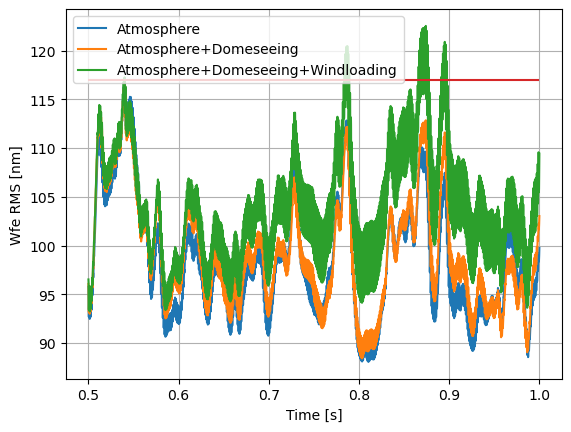

In [15]:
fig, ax = plt.subplots()

i0 = int(0.5*8000)

t = np.arange(df_atmosphere.shape[0])/8000
seg_piston = np.vstack(df_atmosphere["SegmentPiston"])*1e9
wfe_rms = np.vstack(df_atmosphere["WfeRms"])*1e9
seg_wfe_rms = np.vstack(df_atmosphere["SegmentWfeRms"])*1e9

ax.plot(t[i0:], wfe_rms[i0:],label="Atmosphere")

t = np.arange(df_domeseeing.shape[0])/8000
seg_piston = np.vstack(df_domeseeing["SegmentPiston"])*1e9
wfe_rms = np.vstack(df_domeseeing["WfeRms"])*1e9
seg_wfe_rms = np.vstack(df_domeseeing["SegmentWfeRms"])*1e9

ax.plot(t[i0:], wfe_rms[i0:],label="Atmosphere+Domeseeing")

t = np.arange(df_windloading.shape[0])/8000
seg_piston = np.vstack(df_windloading["SegmentPiston"])*1e9
wfe_rms = np.vstack(df_windloading["WfeRms"])*1e9
seg_wfe_rms = np.vstack(df_windloading["SegmentWfeRms"])*1e9

ax.plot(t[i0:], wfe_rms[i0:],label="Atmosphere+Domeseeing+Windloading")

ax.hlines(117,t[i0],t[-1],'C3')

ax.grid()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Wfe RMS [nm]")
ax.legend()


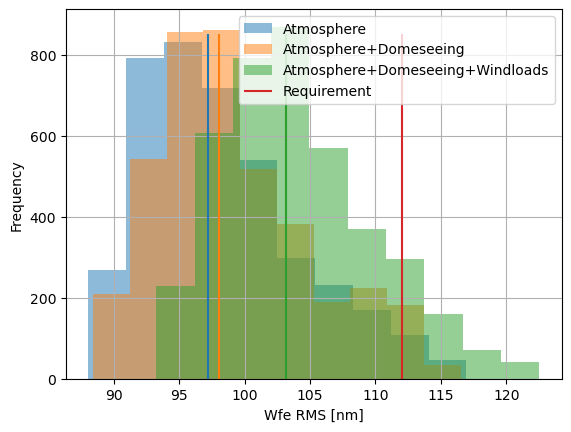

In [16]:
fig,ax = plt.subplots()

wfe_rms = np.vstack(df_atmosphere["WfeRms"])*1e9
ax.hist(wfe_rms[i0:].flatten(),alpha=0.5,label="Atmosphere")
ax.vlines(np.median(wfe_rms[i0:]),0,850,'C0')

wfe_rms = np.vstack(df_domeseeing["WfeRms"])*1e9
ax.hist(wfe_rms[i0:].flatten(),alpha=0.5,label="Atmosphere+Domeseeing")
ax.vlines(np.median(wfe_rms[i0:]),0,850,'C1')

wfe_rms = np.vstack(df_windloading["WfeRms"])*1e9
ax.hist(wfe_rms[i0:].flatten(),alpha=0.5,label="Atmosphere+Domeseeing+Windloads")
ax.vlines(np.median(wfe_rms[i0:]),0,850,'C2')

ax.vlines(112,0,850,'C3',label="Requirement")

ax.grid()
ax.set_xlabel("Wfe RMS [nm]")
ax.set_ylabel("Frequency")
ax.legend()

In [17]:
import glob
import toml

In [24]:
def get_wfe_rms(file,t0=0.5,t1=None):
    with open(os.path.join(file,"settings.toml"), 'r') as f:
        toml_data = f.read()
    cfd_case = toml.loads(toml_data)
    df = pd.read_parquet(os.path.join(file,"ngao.parquet"))
    wfe_rms = np.vstack(df["WfeRms"])*1e9
    i0 = int(t0*8000)
    if t1 is None:
        cfd_case["WfeRms"] = wfe_rms[i0:,:]
    else:
        i1 = int(t1*8000)
        cfd_case["WfeRms"] = wfe_rms[i0:i1,:]
    return cfd_case

In [131]:
t0 = 2
t1 = 7
files = glob.glob("/fsx/ao4elt7/2023-06-21T04:2*/windloading")
windloading = [get_wfe_rms(f,t0,t1) for f in files]

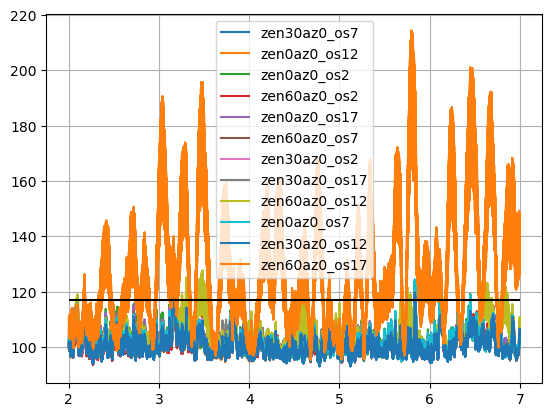

In [132]:
wfe_rms = np.hstack([w["WfeRms"] for w in windloading])
cfd_case = ["zen{}az{}_{}{}".format(c["za"],c["az"],c["vs"],c["ws"]) for c in windloading]
t = np.arange(wfe_rms.shape[0])/8000
fig,ax = plt.subplots()
ax.plot(t0+t,wfe_rms);
ax.hlines(117,t0+t[0],t0+t[-1],'k')
ax.legend(cfd_case)
ax.grid()

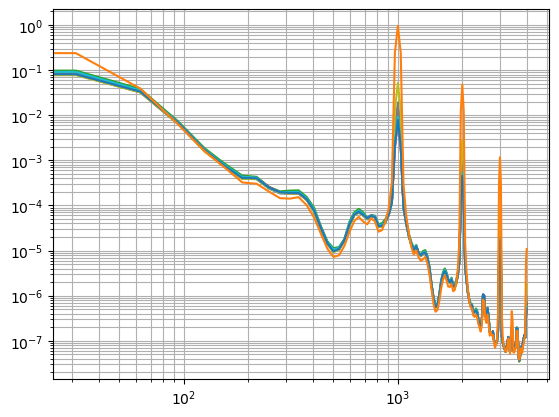

In [142]:
from scipy.signal import welch
wfe_rms = np.hstack([w["WfeRms"] for w in windloading])
(nu,psd) = welch(wfe_rms.T,8e3)

fig,ax = plt.subplots()
ax.loglog(nu,psd.T);
ax.grid(which="both")

In [121]:
files = glob.glob("/fsx/ao4elt7/2023-06-21T04:2*/domeseeing") #+ glob.glob("/fsx/ao4elt7/2023-06-19T05:13:47*/domeseeing")
domeseeing = [get_wfe_rms(f,t0,t1) for f in files]

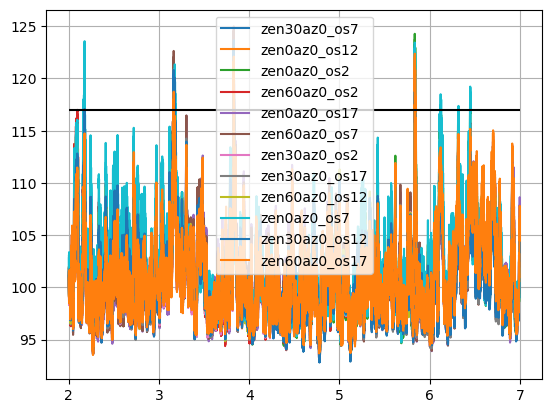

In [122]:
wfe_rms = np.hstack([w["WfeRms"] for w in domeseeing])
cfd_case = ["zen{}az{}_{}{}".format(c["za"],c["az"],c["vs"],c["ws"]) for c in windloading]
t = t0 + np.arange(wfe_rms.shape[0])/8000
fig,ax = plt.subplots()
ax.plot(t,wfe_rms);
ax.hlines(117,t[0],t[-1],'k')
ax.legend(cfd_case)
ax.grid()

In [123]:
i0 = int(t0*8000)
i1 = int(t1*8000)
atmosphere_path = os.path.join(root,"2023-06-21T04:26:39.399720124+00:00","atmosphere")
df_atmosphere = pd.read_parquet(os.path.join(atmosphere_path,"ngao.parquet"))
atm_wfe_rms = np.vstack(df_atmosphere["WfeRms"])*1e9
atm = np.median(atm_wfe_rms[i0:i1])
atm

99.86888471757993

In [124]:
reqt = np.sqrt(np.sum(np.array([78,81,9,34,58,36])**2)*90/96)
reqt

131.84507954413772

Text(14, 105, 'Windscreen Stowed\nVents Closed')

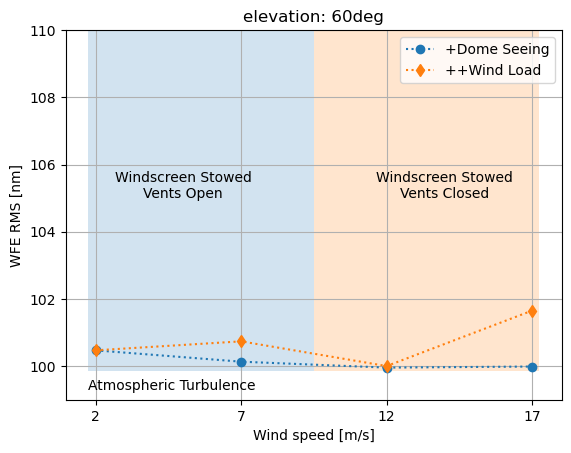

In [127]:
fig,ax=plt.subplots()

atm_wfe_rms = np.vstack(df_atmosphere["WfeRms"])*1e9


for z in [30]:
    med_wfe_rms = np.asarray([np.median(w["WfeRms"]) for w in domeseeing if w["za"]==z])
    ws = np.array([c["ws"] for c in domeseeing if c["za"]==z ])
    i = np.argsort(ws)
    ax.plot(ws[i],med_wfe_rms[i],'o:',label="+Dome Seeing")

    med_wfe_rms = np.asarray([np.median(w["WfeRms"]) for w in windloading if w["za"]==z])
    ws = np.array([c["ws"] for c in windloading if c["za"]==z ])
    i = np.argsort(ws)
    ax.plot(ws[i],med_wfe_rms[i],'d:',label="++Wind Load")
    ax.set_title("elevation: {}deg".format(90-z))

ax.fill_betweenx([atm,reqt],1.75,9.5,alpha=0.2)
ax.fill_betweenx([atm,reqt],9.5,17.25,alpha=0.2)

ax.set_ylim([99,110])
#ax.hlines(np.median(atm_wfe_rms[i0:]),2,17,'k')
ax.grid()
ax.set_xticks([2,7,12,17])
ax.set_xlabel("Wind speed [m/s]")
ax.set_ylabel("WFE RMS [nm]")
ax.legend()
ax.text(1.75,atm-0.25,"Atmospheric Turbulence",va="top")
#ax.text(1.75,reqt+0.2,"NGAO OPM Requirement")
ax.text(5,105,"Windscreen Stowed\nVents Open",ha="center")
ax.text(14,105,"Windscreen Stowed\nVents Closed",ha="center")


Text(14, 120, 'Windscreen Stowed\nVents Closed')

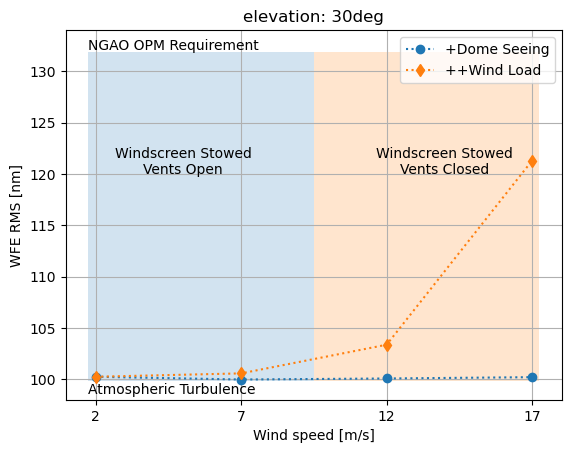

In [128]:
fig,ax=plt.subplots()

atm_wfe_rms = np.vstack(df_atmosphere["WfeRms"])*1e9


for z in [60]:
    med_wfe_rms = np.asarray([np.median(w["WfeRms"]) for w in domeseeing if w["za"]==z])
    ws = np.array([c["ws"] for c in domeseeing if c["za"]==z ])
    i = np.argsort(ws)
    ax.plot(ws[i],med_wfe_rms[i],'o:',label="+Dome Seeing")

    med_wfe_rms = np.asarray([np.median(w["WfeRms"]) for w in windloading if w["za"]==z])
    ws = np.array([c["ws"] for c in windloading if c["za"]==z ])
    i = np.argsort(ws)
    ax.plot(ws[i],med_wfe_rms[i],'d:',label="++Wind Load")
    ax.set_title("elevation: {}deg".format(90-z))

ax.fill_betweenx([atm,reqt],1.75,9.5,alpha=0.2)
ax.fill_betweenx([atm,reqt],9.5,17.25,alpha=0.2)

ax.set_ylim([98,134])
#ax.hlines(np.median(atm_wfe_rms[i0:]),2,17,'k')
ax.grid()
ax.set_xticks([2,7,12,17])
ax.set_xlabel("Wind speed [m/s]")
ax.set_ylabel("WFE RMS [nm]")
ax.legend()
ax.text(1.75,atm-0.25,"Atmospheric Turbulence",va="top")
ax.text(1.75,reqt+0.2,"NGAO OPM Requirement")
ax.text(5,120,"Windscreen Stowed\nVents Open",ha="center")
ax.text(14,120,"Windscreen Stowed\nVents Closed",ha="center")


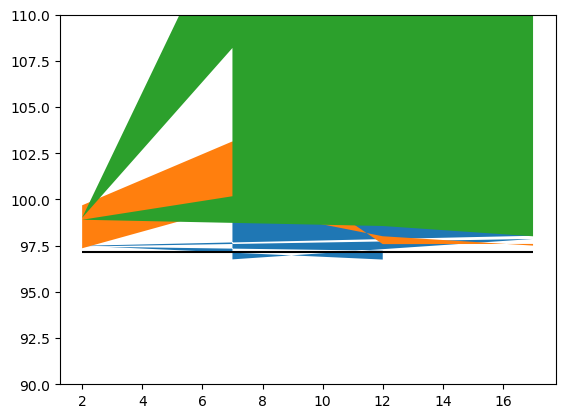

In [27]:
fig,ax=plt.subplots()

atm_wfe_rms = np.vstack(df_atmosphere["WfeRms"])*1e9


for z in [0,30,60]:
    med_wfe_rms_ds = np.asarray([np.median(w["WfeRms"]) for w in domeseeing if w["za"]==z])
    ws = np.array([c["ws"] for c in domeseeing if c["za"]==z ])
    i_ds = np.argsort(ws)
    med_wfe_rms_wl = np.asarray([np.median(w["WfeRms"]) for w in windloading if w["za"]==z])
    ws = np.array([c["ws"] for c in windloading if c["za"]==z ])
    i_wl = np.argsort(ws)
    ax.fill_between(ws[i],med_wfe_rms_ds[i],med_wfe_rms_wl[i])

    ax.set_ylim([90,110])

ax.hlines(np.median(atm_wfe_rms[i0:]),2,17,'k')


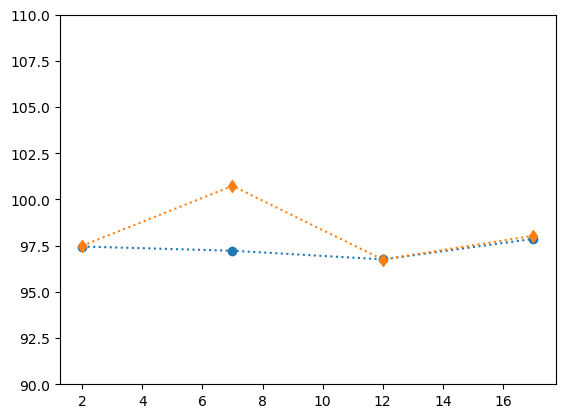

In [109]:
fig,ax=plt.subplots()

for z in [0]:
    med_wfe_rms = np.asarray([np.median(w["WfeRms"]) for w in domeseeing if w["za"]==z])
    ws = np.array([c["ws"] for c in domeseeing if c["za"]==z ])
    i = np.argsort(ws)
    ax.plot(ws[i],med_wfe_rms[i],'o:')

    med_wfe_rms = np.asarray([np.median(w["WfeRms"]) for w in windloading if w["za"]==z])
    ws = np.array([c["ws"] for c in windloading if c["za"]==z ])
    i = np.argsort(ws)
    ax.plot(ws[i],med_wfe_rms[i],'d:')
    ax.set_ylim([90,110])

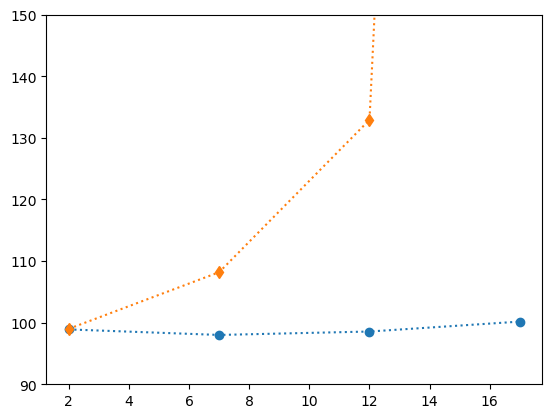

In [112]:
fig,ax=plt.subplots()

for z in [60]:
    med_wfe_rms = np.asarray([np.median(w["WfeRms"]) for w in domeseeing if w["za"]==z])
    ws = np.array([c["ws"] for c in domeseeing if c["za"]==z ])
    i = np.argsort(ws)
    ax.plot(ws[i],med_wfe_rms[i],'o:')

    med_wfe_rms = np.asarray([np.median(w["WfeRms"]) for w in windloading if w["za"]==z])
    ws = np.array([c["ws"] for c in windloading if c["za"]==z ])
    i = np.argsort(ws)
    ax.plot(ws[i],med_wfe_rms[i],'d:')
    ax.set_ylim([90,150])

(90.0, 150.0)

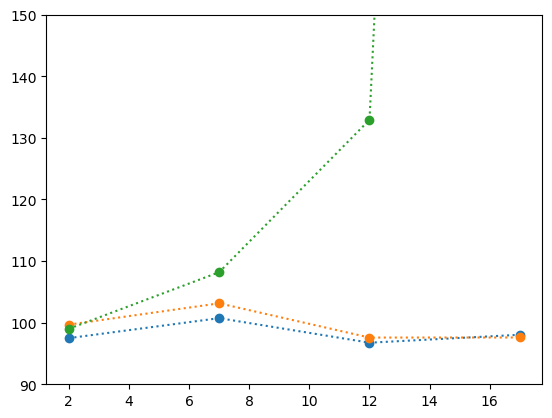

In [103]:
fig,ax=plt.subplots()

for z in [0,30,60]:
    med_wfe_rms = np.asarray([np.median(w["WfeRms"]) for w in windloading if w["za"]==z])
    ws = np.array([c["ws"] for c in windloading if c["za"]==z ])
    i = np.argsort(ws)
    ax.plot(ws[i],med_wfe_rms[i],'o:')
ax.set_ylim([90,150])

In [97]:
data_path = os.path.join(root,"2023-06-19T05:13:47.239006176+00:00","domeseeing")
df = pd.read_parquet(os.path.join(data_path,"ngao.parquet"))
df

,WfeRms,SegmentWfeRms,SegmentPiston
0,[1.6561073152843164e-06],"[1.0821297564689303e-06, 1.5542015034952783e-0...","[2.655256366779213e-06, 9.144196155830286e-07,..."
1,[1.6561416487093084e-06],"[1.082867015611555e-06, 1.5550194802926853e-06...","[2.654543322933023e-06, 9.153810083262215e-07,..."
2,[1.6562290738875163e-06],"[1.0834777413037955e-06, 1.5551754586340394e-0...","[2.6535433335084235e-06, 9.157574254459178e-07..."
3,[1.656095264479518e-06],"[1.083722963812761e-06, 1.5547632301604608e-06...","[2.652863940966199e-06, 9.150645041700045e-07,..."
4,[1.6560685480726534e-06],"[1.08354288386181e-06, 1.5542568689852487e-06,...","[2.6515197077969788e-06, 9.144945352090872e-07..."
...,...,...,...
159995,[1.0845628821698483e-06],"[1.0306026752004982e-06, 1.145211740549712e-06...","[1.5818306664527881e-09, 3.831680306376484e-09..."
159996,[1.0857684173970483e-06],"[1.0318851764168357e-06, 1.145070427810424e-06...","[1.4446792651057194e-09, 5.819580373156441e-09..."
159997,[1.0879650744755054e-06],"[1.0337369076296454e-06, 1.1455322237452492e-0...","[6.336198232759216e-10, 5.4409561300872156e-09..."
159998,[1.0892293857978075e-06],"[1.0346875569666736e-06, 1.1457428854555474e-0...","[-5.67224600622751e-10, 3.5542722098824697e-09..."


In [ ]:
data_path = os.path.join(root,"2023-06-19T05:12:05.914605020+00:00","windloading")
df = pd.read_parquet(os.path.join(data_path,"ngao.parquet"))
df

,WfeRms,SegmentWfeRms,SegmentPiston
0,[2.031532858381979e-06],"[1.5418696648339392e-06, 1.8000577028942644e-0...","[5.4123660220284364e-08, 1.7618718572975922e-0..."
1,[2.0315192159614526e-06],"[1.5424971024913248e-06, 1.8004864159593126e-0...","[5.34209547708997e-08, 1.7714390310175077e-07,..."
2,[2.0315771962486906e-06],"[1.543004259474401e-06, 1.800570771592902e-06,...","[5.262181446141767e-08, 1.775937619186152e-07,..."
3,[2.0316581412771484e-06],"[1.5431302244905964e-06, 1.8002602928390843e-0...","[5.195315821993063e-08, 1.7689519893338002e-07..."
4,[2.03184868041717e-06],"[1.5432096915901639e-06, 1.8000229147219216e-0...","[5.062109664777381e-08, 1.7631184334732097e-07..."
...,...,...,...
175995,[1.044594682753086e-06],"[1.0449043656990398e-06, 9.843594170888537e-07...","[3.4860478947962292e-09, -1.1218135309576382e-..."
175996,[1.0455214578541927e-06],"[1.0450939953443594e-06, 9.85049041446473e-07,...","[3.1887268381325384e-09, -5.845753880961979e-1..."
175997,[1.046468355525576e-06],"[1.0470919278304791e-06, 9.862485512712738e-07...","[3.526450464974573e-09, -1.0893913549026024e-0..."
175998,[1.0470106417415082e-06],"[1.048684225679608e-06, 9.863831564871361e-07,...","[4.133537068184978e-09, -2.0680588352917084e-0..."


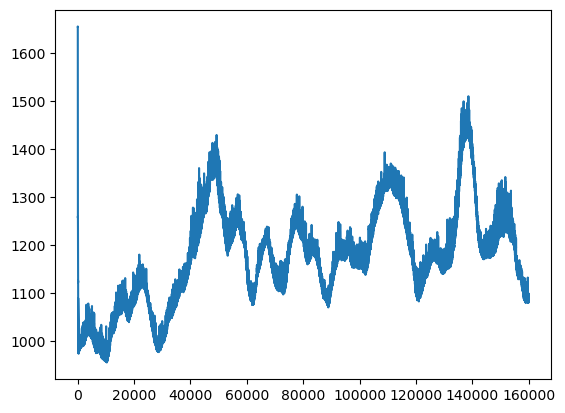

In [98]:
wfe_rms = np.vstack(df["WfeRms"])*1e9
plt.plot(wfe_rms)